In [ ]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("Transactions.csv")

# Inspect the data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:
# print(customers.info())
# print(products.info())
# print(transactions.info())

# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
customers.dropna(inplace=True)  # Example: Drop rows with missing values

In [ ]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [ ]:
merged_data.to_csv("processed_data.csv", index=False)

In [ ]:
print(merged_data.describe())
print(merged_data.info())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          

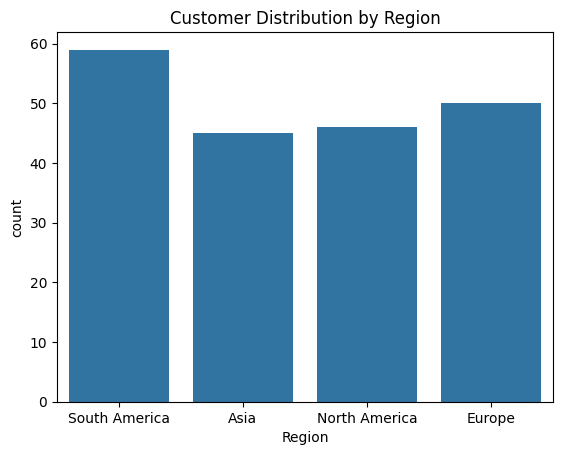

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()
# Customer Distribution by Region

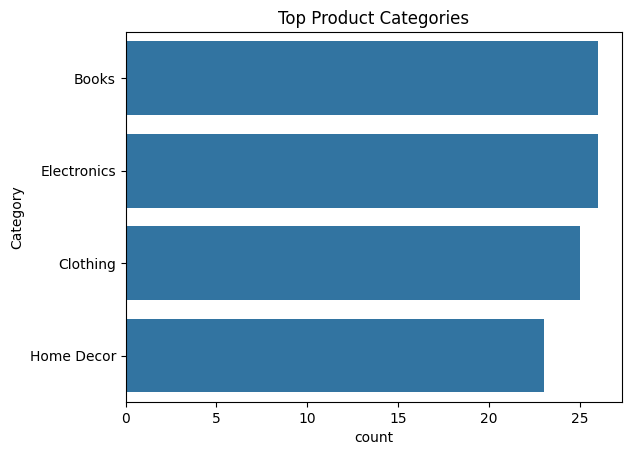

In [ ]:
# Top Product Categories:
sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index)
plt.title('Top Product Categories')
plt.show()

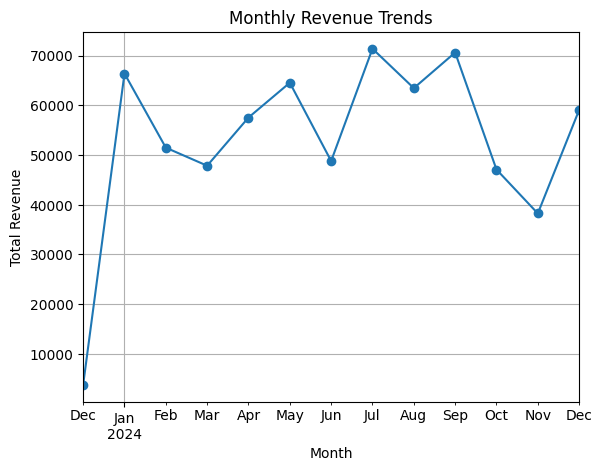

In [ ]:
# Ensure 'TransactionDate' is in datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Group by the month and calculate the sum of 'TotalValue'
monthly_revenue = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot the revenue trends
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [ ]:
# Identify Key Insights:

# Example Insights:
# "Region X contributes to the majority of sales."
# "Category Y is the most popular product category."
# "Revenue has grown consistently over the past months."

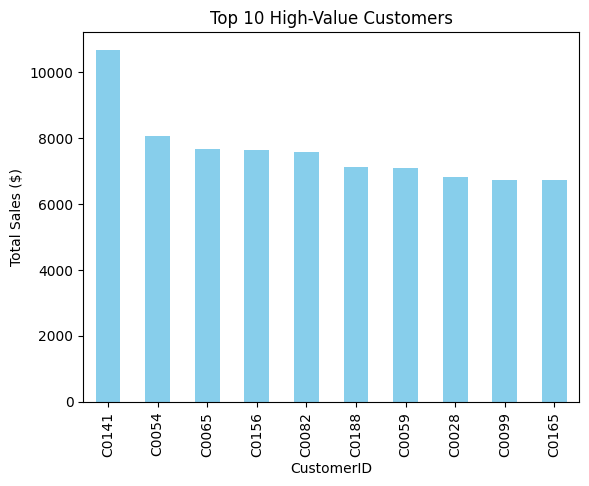

Top 10 customers contribute 11.02% of total sales.


In [ ]:
# Group by CustomerID and calculate total sales per customer
customer_sales = merged_data.groupby('CustomerID')['TotalValue'].sum()

# Sort customers by total sales in descending order
high_value_customers = customer_sales.sort_values(ascending=False)

# Identify the top 10 high-value customers
top_10_customers = high_value_customers.head(10)

# Plot the top 10 high-value customers' total sales
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 High-Value Customers')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales ($)')
plt.show()

# Calculate the percentage of total sales from top 10 customers
total_sales = customer_sales.sum()
high_value_sales = top_10_customers.sum()
percentage_sales = (high_value_sales / total_sales) * 100
print(f"Top 10 customers contribute {percentage_sales:.2f}% of total sales.")


In [ ]:
print(merged_data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [ ]:
print(merged_data[['Price_x', 'Price_y']].head())

   Price_x  Price_y
0   300.68   300.68
1   300.68   300.68
2   300.68   300.68
3   300.68   300.68
4   300.68   300.68


<ipython-input-21-c98be886c914>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = merged_data.groupby('PriceRange').agg(


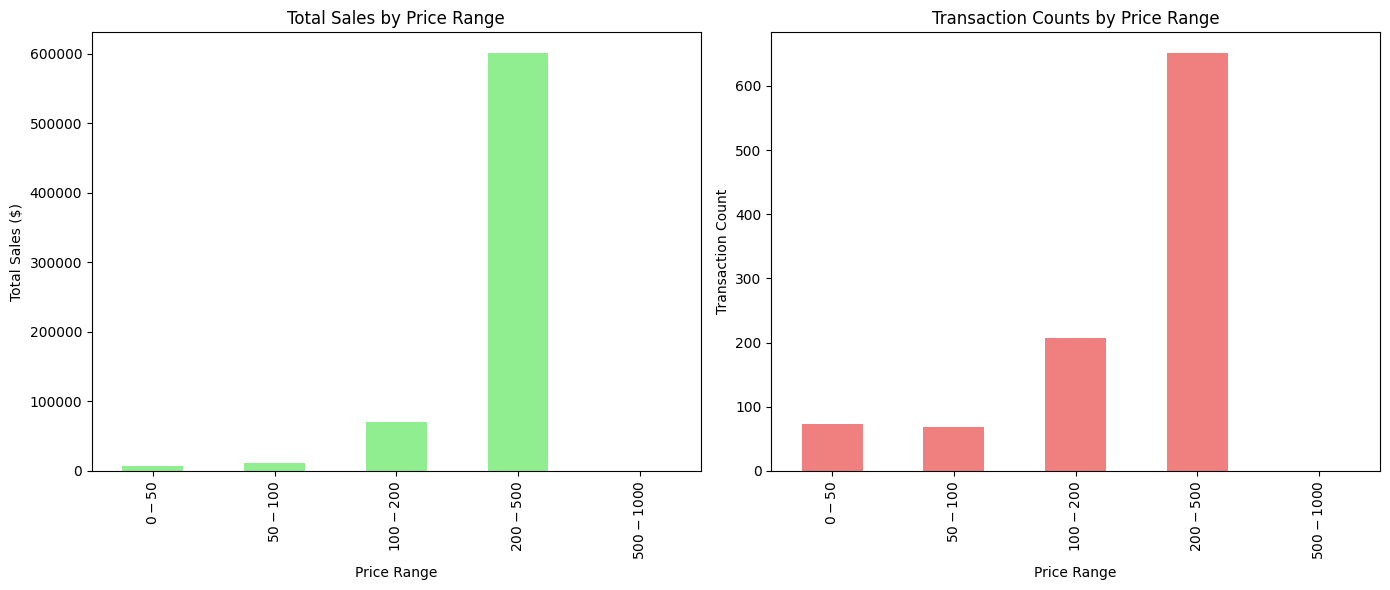

The price range with the highest total sales is: $200-$500


In [ ]:
# Use the correct price column (Price_x or Price_y)
merged_data['PriceRange'] = pd.cut(merged_data['Price_x'], bins=[0, 50, 100, 200, 500, 1000],
                                   labels=['$0-$50', '$50-$100', '$100-$200', '$200-$500', '$500-$1000'])

# Group by price range and calculate total sales and transaction count
price_range_sales = merged_data.groupby('PriceRange').agg(
    total_sales=('TotalValue', 'sum'),
    transaction_count=('TotalValue', 'count')
)

# Plot total sales and transaction counts by price range
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot total sales by price range
price_range_sales['total_sales'].plot(kind='bar', color='lightgreen', ax=ax[0])
ax[0].set_title('Total Sales by Price Range')
ax[0].set_xlabel('Price Range')
ax[0].set_ylabel('Total Sales ($)')

# Plot transaction counts by price range
price_range_sales['transaction_count'].plot(kind='bar', color='lightcoral', ax=ax[1])
ax[1].set_title('Transaction Counts by Price Range')
ax[1].set_xlabel('Price Range')
ax[1].set_ylabel('Transaction Count')

plt.tight_layout()
plt.show()

# Find the price range with the highest total sales
top_price_range = price_range_sales['total_sales'].idxmax()
print(f"The price range with the highest total sales is: {top_price_range}")


In [ ]:
customer_product_matrix = merged_data.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', aggfunc='sum', fill_value=0)
